In [46]:
!pip install pandas numpy matplotlib boto3 kubernetes PyYAML

In [47]:
import glob
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# matplotlib.use('tkAgg')

In [48]:
%matplotlib inline

In [49]:
%cd /mnt/Jonas/Projetos/Artigos/1_Artigo
# %cd ~/Teste/Artigos/1_Artigo/

/mnt/Jonas/Projetos/Artigos/1_Artigo


In [50]:
def obter_arquivos_statistics(base_dir):
    pattern = f"{base_dir}/**/statistics.csv"
    return glob.glob(pattern, recursive=True)  

def _to_float(value) -> float:
    try:
        return float(str(value))
    except ValueError:
        return 0.1

In [51]:
arquivos = obter_arquivos_statistics('simulation')
por_data_hora = defaultdict(list)

for arquivo in arquivos:
    partes = arquivo.split(os.sep)
    if len(partes) >= 5:
        data = f"{partes[1]}/{partes[2]}/{partes[3]}"  # YYYY/MM/DD
        hora = partes[4]  # HHMMSS
        chave = f"{data} {hora}"
        por_data_hora[chave].append(arquivo)

 Simulação       Data   Hora  Duração (h)  Downtime (h)  Disponibilidade (%)  Mean Recovery Time
 ITERACAO1 2025/11/11 100837       1000.0      0.185382            99.981462           11.311450
 ITERACAO2 2025/11/11 100837       1000.0      0.261386            99.973861           14.702951
 ITERACAO3 2025/11/11 100837       1000.0      0.253779            99.974622           12.345985
 ITERACAO4 2025/11/11 100837       1000.0      0.179273            99.982073            9.928961
 ITERACAO5 2025/11/11 100837       1000.0      0.165923            99.983408            8.915239
 ITERACAO6 2025/11/11 100837       1000.0      0.099713            99.990029            6.647529
 ITERACAO7 2025/11/11 100837       1000.0      0.201892            99.979811           11.722752
 ITERACAO8 2025/11/11 100837       1000.0      0.239169            99.976083           15.944576
 ITERACAO9 2025/11/11 100837       1000.0      0.183740            99.981626            9.186986
ITERACAO10 2025/11/11 100837  

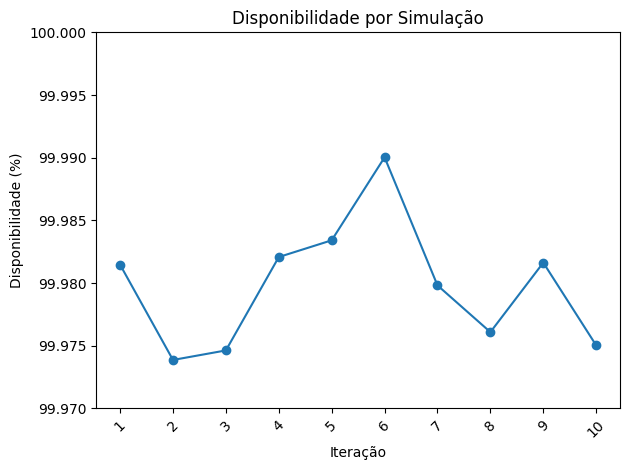

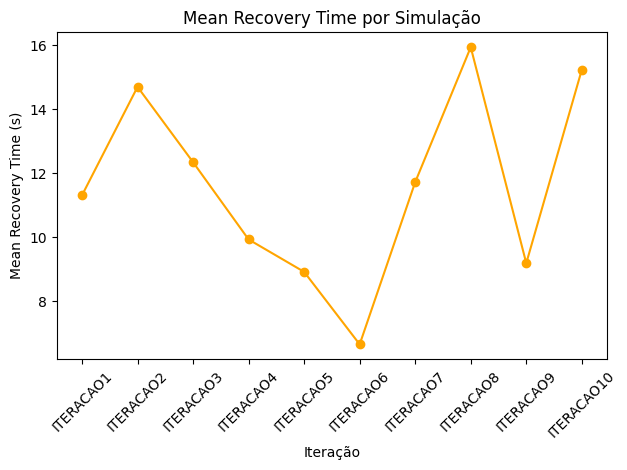

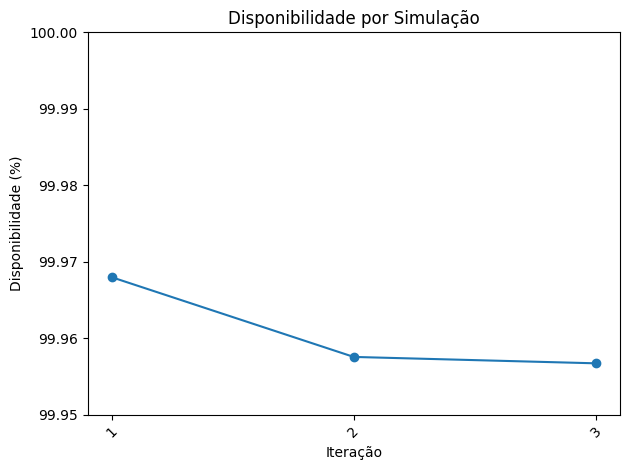

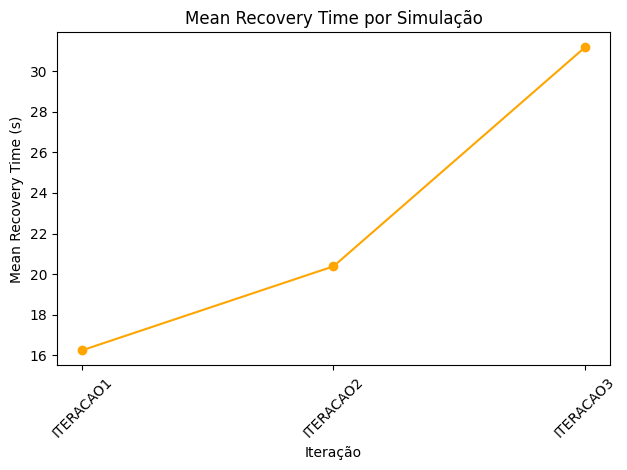

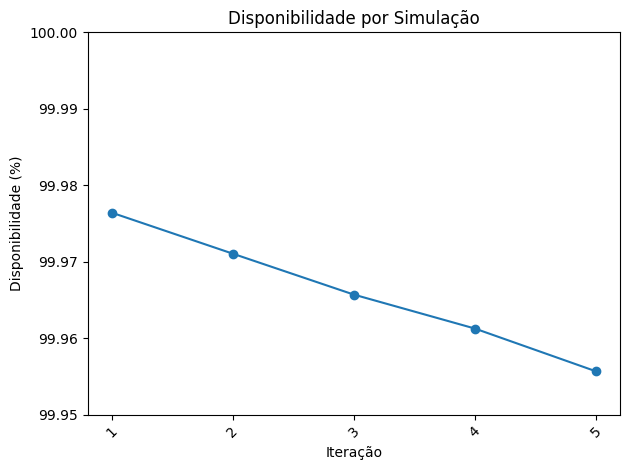

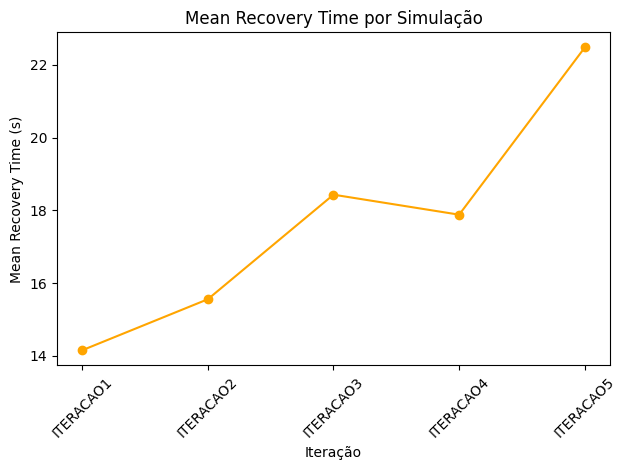

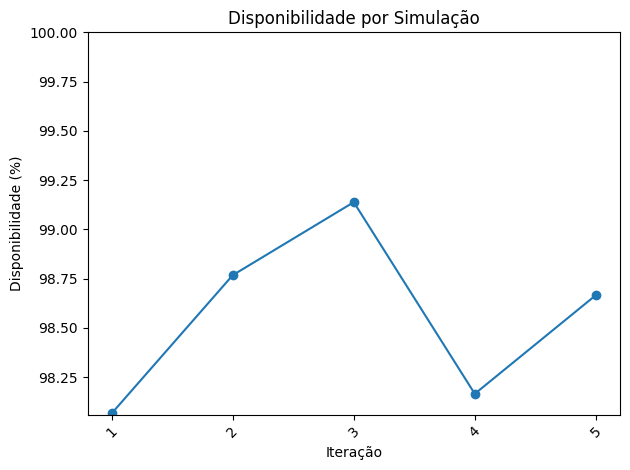

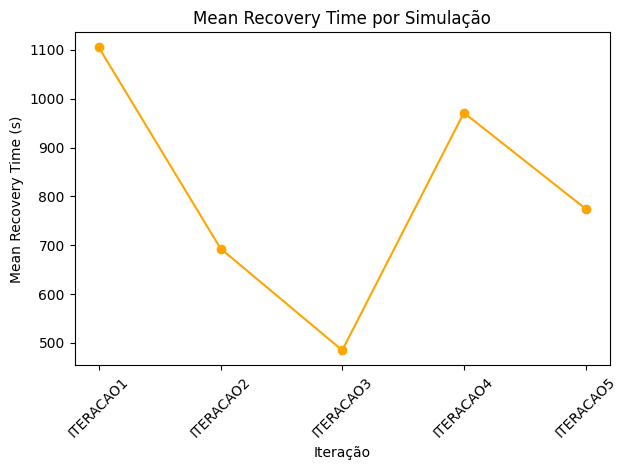

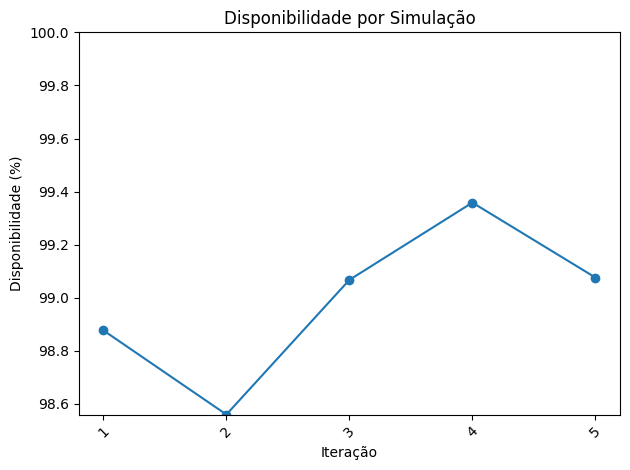

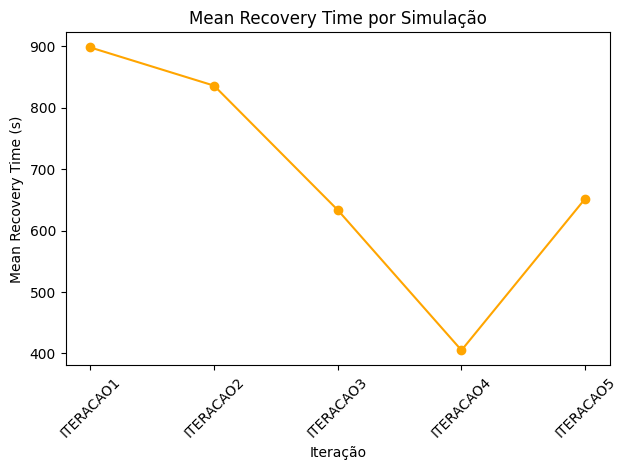

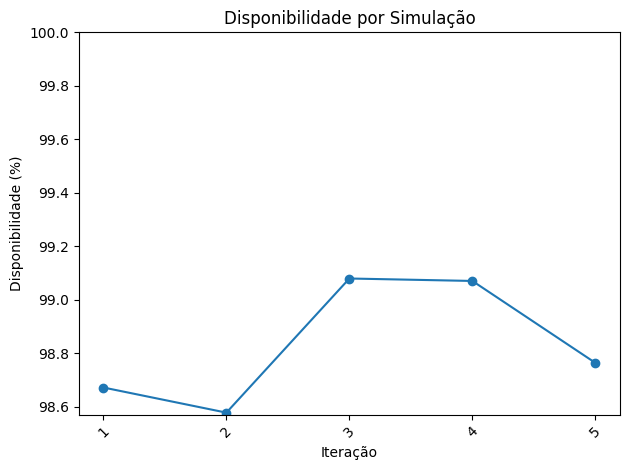

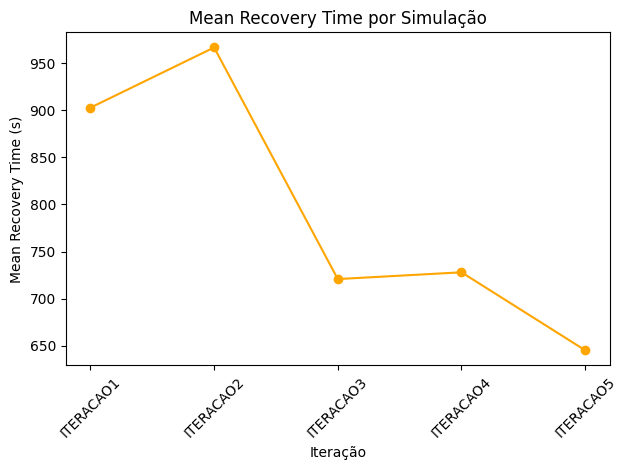

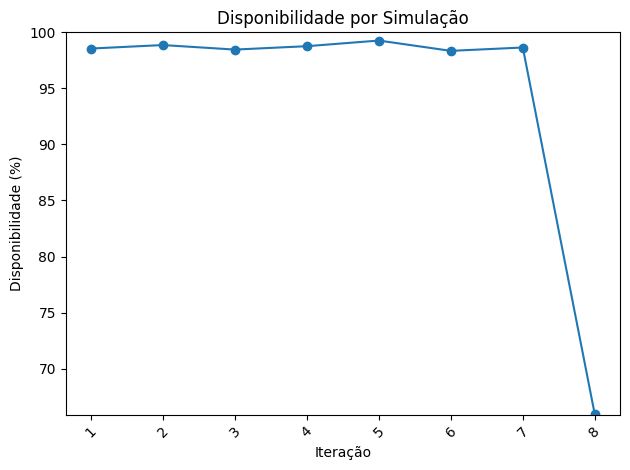

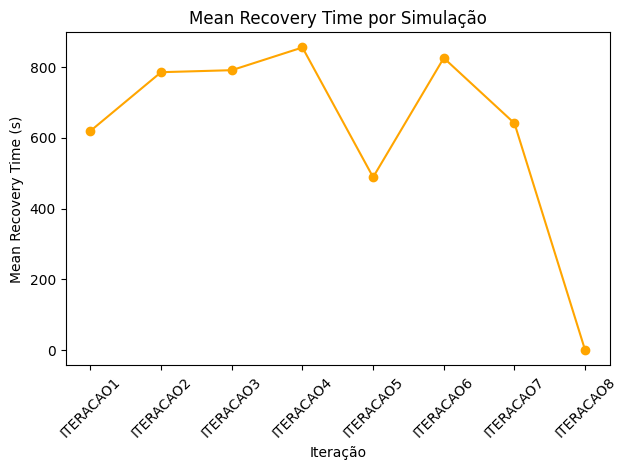

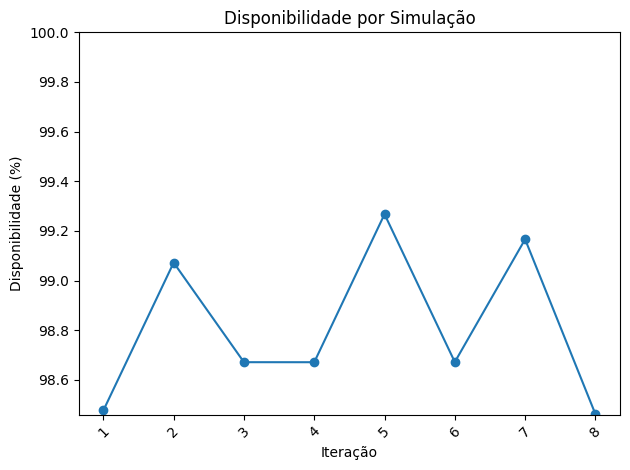

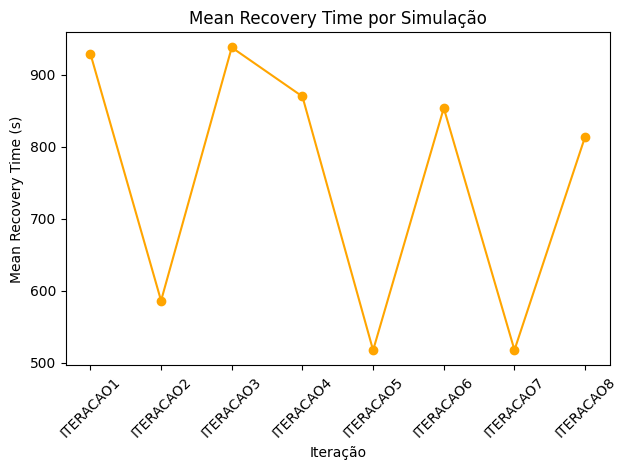

In [52]:

resultados = []

for chave, lista in por_data_hora.items():
    data, hora = chave.split()
    if len(lista) >= 3:
        for arq in lista:
            df = pd.read_csv(arq)
            nome_simulacao = os.path.basename(os.path.dirname(arq))
            metricas = dict(zip(df.iloc[:,0], df.iloc[:,1]))
            if "duration_hours" in metricas and "total_downtime" in metricas:
                duracao = metricas["duration_hours"]
                downtime = metricas["total_downtime"]
                disponibilidade = (1 - (_to_float(downtime) / _to_float(duracao))) * 100
                mean_recovery_time = metricas.get("mean_recovery_time", None)
                resultados.append({
                    "Simulação": nome_simulacao,
                    "Data": data,
                    "Hora": hora,
                    "Duração (h)": duracao,
                    "Downtime (h)": downtime,
                    "Disponibilidade (%)": disponibilidade,
                    "Mean Recovery Time": mean_recovery_time
                })
        if resultados:
            df_resultados = pd.DataFrame(resultados)

            # Gráfico de disponibilidade por simulação
            plt.figure()
            plt.plot(df_resultados["Simulação"].str.extract(r'(\d+)')[0].astype(int), df_resultados["Disponibilidade (%)"], marker='o')
            plt.xticks(df_resultados["Simulação"].str.extract(r'(\d+)')[0].astype(int)) 
            plt.title("Disponibilidade por Simulação")
            plt.xlabel("Iteração")
            plt.ylabel("Disponibilidade (%)")
            # Define o limite inferior do eixo y como o mínimo arredondado para baixo (sempre pra menos)
            plt.ylim(np.floor(df_resultados["Disponibilidade (%)"].min()*100)/100, 100) 
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig("disponibilidade_por_simulacao.png")
            # plt.show()

            # Gráfico de mean_recovery_time por simulação
            plt.figure()
            plt.plot(df_resultados["Simulação"], df_resultados["Mean Recovery Time"], marker='o', color='orange')
            plt.title("Mean Recovery Time por Simulação")
            plt.xlabel("Iteração")
            plt.ylabel("Mean Recovery Time (s)")
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig("mean_recovery_time_por_simulacao.png")
            # plt.show()

            print(df_resultados.to_string(index=False))
            resultados = []

In [53]:

arquivos = obter_arquivos_statistics('simulation')
por_data_hora = defaultdict(list)

for arquivo in arquivos:
    partes = arquivo.split(os.sep)
    if len(partes) >= 5:
        data = f"{partes[1]}/{partes[2]}/{partes[3]}"  # YYYY/MM/DD
        hora = partes[4]  # HHMMSS
        chave = f"{data} {hora}"
        por_data_hora[chave].append(arquivo)

resultados = []
all_results = []

for chave, lista in por_data_hora.items():
    data, hora = chave.split()
    if len(lista) >= 3:
        for arq in lista:
            df = pd.read_csv(arq)
            nome_simulacao = os.path.basename(os.path.dirname(arq))
            metricas = dict(zip(df.iloc[:,0], df.iloc[:,1]))
            if "duration_hours" in metricas and "total_downtime" in metricas:
                duracao = metricas["duration_hours"]
                downtime = metricas["total_downtime"]
                disponibilidade = (1 - (_to_float(downtime) / _to_float(duracao))) * 100
                mean_recovery_time = metricas.get("mean_recovery_time", None)
                resultados.append({
                    "Simulação": nome_simulacao,
                    "Data": data,
                    "Hora": hora,
                    "Duração (h)": duracao,
                    "Downtime (h)": downtime,
                    "Disponibilidade (%)": disponibilidade,
                    "Mean Recovery Time": mean_recovery_time
                })
                
        if resultados:
            index = 0
            df_resultados = pd.DataFrame(resultados)

            # print(df_resultados.to_string(index=False))
            all_results.append(resultados)
            
            index += 1
            resultados = []
            
# Combine all mean recovery times into a single DataFrame for display
tabelas = []
for res in all_results:
    df_resultados = pd.DataFrame(res)
    mean_recovery = df_resultados['Mean Recovery Time'].mean()
    std_recovery = df_resultados['Mean Recovery Time'].std()
    mean_disponibilidade = df_resultados['Disponibilidade (%)'].mean()
    std_disponibilidade = df_resultados['Disponibilidade (%)'].std()
    mean_downtime = df_resultados['Downtime (h)'].mean()
    std_downtime = df_resultados['Downtime (h)'].std()
    tabelas.append({
        "Data": df_resultados["Data"].iloc[0],
        "Hora": df_resultados["Hora"].iloc[0],
        "N_Iteracoes": len(df_resultados),
        "Mean Recovery Time (média ±σ )": f"{mean_recovery:.2f} (±{std_recovery:.2f})",
        "Dispobinilidade (Média)": f"{mean_disponibilidade:.2f} (±{std_disponibilidade:.2f})",
        "Downtime (h) (Média)": f"{mean_downtime:.2f} (±{std_downtime:.2f})"
    })
tabela_final = pd.DataFrame(tabelas)
display(tabela_final)

,Data,Hora,N_Iteracoes,Mean Recovery Time (média ±σ ),Dispobinilidade (Média),Downtime (h) (Média)
0,2025/11/11,100837,10,11.59 (±3.03),99.98 (±0.01),0.20 (±0.05)
1,2025/11/10,003128,3,22.60 (±7.71),99.96 (±0.01),0.39 (±0.06)
2,2025/11/10,081106,5,17.70 (±3.19),99.97 (±0.01),0.34 (±0.08)
3,2025/11/23,081848,5,805.88 (±241.66),98.56 (±0.44),14.40 (±4.44)
4,2025/11/24,162047,5,685.04 (±193.90),98.99 (±0.29),10.12 (±2.94)
5,2025/11/24,224336,5,792.62 (±135.44),98.83 (±0.23),11.68 (±2.31)
6,2025/11/25,080413,8,626.12 (±281.96),94.60 (±11.60),53.99 (±115.98)
7,2025/11/25,232515,8,753.33 (±182.04),98.81 (±0.32),11.93 (±3.15)


## Disponibilidade Pods

In [54]:
arquivo_pasta = 'disponibilidade'

In [55]:
import glob
import os
import pandas as pd

# Buscar todos os arquivos experiment_components.csv no projeto
arquivos = glob.glob(f'{arquivo_pasta}/**/experiment_components.csv', recursive=True)

resultados = []

for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    worker_nodes = df[df['component_type'] == 'worker_node']
    control_plane = df[df['component_type'] == 'control_plane']
    total_failures_wn = worker_nodes['total_failures'].astype(int).sum()
    total_failures_cp = control_plane['total_failures'].astype(int).sum()
    pasta = os.path.dirname(arquivo)
    resultados.append({
        "Pasta": pasta,
        "Total de falhas (worker_node)": total_failures_wn,
        "Total de falhas (control_plane)": total_failures_cp
    })

df_resultados_falhas = pd.DataFrame(resultados)
df_resultados_falhas = df_resultados_falhas.sort_values(by=["Pasta"]).reset_index(drop=True)
print(df_resultados_falhas.to_string(index=False))

KeyError: 'Pasta'

                Pods  Disponibilidade  Total de Falhas
0  1-pod-a e 1-pod-b        98.893066            124.0
1  1-pod-a e 2-pod-b        99.371219            126.0
2  2-pod-a e 1-pod-b        99.594813            118.0
3  2-pod-a e 2-pod-b        99.699585            136.0
4  3-pod-a e 3-pod-b        99.697835            121.0
5  4-pod-a e 4-pod-b        99.796942            101.0
6  5-pod-a e 5-pod-b        99.697381            111.0


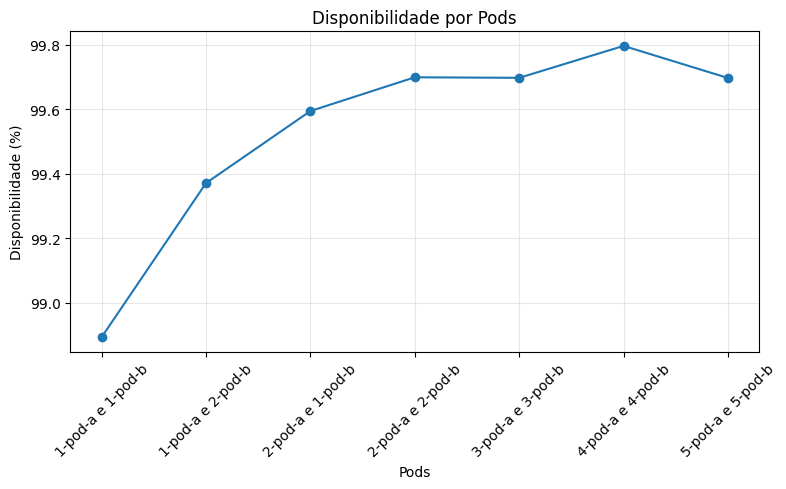

In [ ]:
def extrair_pods_nome(pasta):
    # Exemplo: disponibilidade/2_2/112258/ITERACAO1 -> "2-pod-a e 2-pod-b"
    partes = pasta.split(os.sep)
    if len(partes) > 1:
        pods = partes[1]
        if "_" in pods:
            a, b = pods.split("_")
            return f"{a}-pod-a e {b}-pod-b"
    return "N/A"

# Buscar todos os arquivos experiment_components.csv no projeto
arquivos = glob.glob(f'{arquivo_pasta}/**/statistics.csv', recursive=True)

resultados = []

for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    duration_hours = df.loc[df['metric'] == 'duration_hours', 'value'].values[0]
    total_downtime = df.loc[df['metric'] == 'total_downtime', 'value'].values[0]
    tempo_disponivel = duration_hours - total_downtime
    disponibilidade = (tempo_disponivel / duration_hours) * 100
    
    total_failures = df.loc[df['metric'] == 'total_failures', 'value'].values[0]
    
    pods = extrair_pods_nome(arquivo)
    resultados.append({
        "Pods": pods,
        "Disponibilidade": disponibilidade,
        "Total de Falhas": total_failures        
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="Pods").reset_index(drop=True)

print(df_resultados)
# print(df_resultados[['Pods', 'Disponibilidade']].to_string(index=False))

plt.figure(figsize=(8, 5))
plt.plot(df_resultados['Pods'], df_resultados['Disponibilidade'], marker='o')
plt.xlabel('Pods')
plt.ylabel('Disponibilidade (%)')
plt.title('Disponibilidade por Pods')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import glob
import os
import pandas as pd

# Buscar todos os arquivos experiment_components.csv no projeto
arquivos = glob.glob(f'{arquivo_pasta}/**/statistics.csv', recursive=True)

resultados = []

for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    
    duration_hours = df.loc[df['metric'] == 'duration_hours', 'value'].values[0]
    total_downtime = df.loc[df['metric'] == 'total_downtime', 'value'].values[0]
    tempo_disponivel = duration_hours - total_downtime
    disponibilidade = (tempo_disponivel / duration_hours) * 100
    pasta = os.path.dirname(os.path.dirname(arquivo))
    # print(f"Arquivo: {arquivo}")
    # print(f"{arquivo} - Total Downtime (h): {total_downtime}")
    # Extrai o nome da configuração (pods) e total de falhas de worker_node para cada arquivo
    config = extrair_pods_nome(arquivo)
    pasta = os.path.dirname(os.path.dirname(arquivo))
    # Para buscar o total de falhas, utilize o DataFrame df_resultados da célula 12
    if "Total de falhas (worker_node)" in df_resultados_falhas.columns:
        falhas_worker = df_resultados_falhas[df_resultados_falhas["Pasta"] == pasta]["Total de falhas (worker_node)"]
        falhas_worker = falhas_worker.values[0] if not falhas_worker.empty else None
    else:
        falhas_worker = None
        
    if "Total de falhas (control_plane)" in df_resultados_falhas.columns:
        falhas_control = df_resultados_falhas[df_resultados_falhas["Pasta"] == pasta]["Total de falhas (control_plane)"]
        falhas_control = falhas_control.values[0] if not falhas_control.empty else None
    else:
        falhas_control = None

    resultados.append({
        "Configuração": config,
        "Disponibilidade": disponibilidade,
        "Falhas Worker Node": falhas_worker,
        "Falhas Control Plane": falhas_control,
        "Total de Falhas": df_resultados[df_resultados["Pods"] == config]["Total de Falhas"].values[0]
    })

df_resultados_final = pd.DataFrame(resultados)
df_resultados_final = df_resultados_final.sort_values(by="Configuração").reset_index(drop=True)
print(df_resultados_final.to_string(index=False))

     Configuração  Disponibilidade  Falhas Worker Node  Falhas Control Plane  Total de Falhas
1-pod-a e 1-pod-b        98.893066                  33                     1            124.0
1-pod-a e 2-pod-b        99.371219                  31                     2            126.0
2-pod-a e 1-pod-b        99.594813                  34                     1            118.0
2-pod-a e 2-pod-b        99.699585                  32                     3            136.0
3-pod-a e 3-pod-b        99.697835                  21                     3            121.0
4-pod-a e 4-pod-b        99.796942                  25                     2            101.0
5-pod-a e 5-pod-b        99.697381                  22                     3            111.0


In [ ]:
import glob
import os
import pandas as pd

# Buscar todos os arquivos experiment_components.csv no projeto
arquivos = glob.glob(f'{arquivo_pasta}/**/statistics.csv', recursive=True)

resultados = []

for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    
    duration_hours = df.loc[df['metric'] == 'duration_hours', 'value'].values[0]
    total_downtime = df.loc[df['metric'] == 'total_downtime', 'value'].values[0]
    tempo_disponivel = duration_hours - total_downtime
    disponibilidade = (tempo_disponivel / duration_hours) * 100
    pasta = os.path.dirname(os.path.dirname(arquivo))
    # print(f"Arquivo: {arquivo}")
    # print(f"{arquivo} - Total Downtime (h): {total_downtime}")
    # Extrai o nome da configuração (pods) e total de falhas de worker_node para cada arquivo
    config = extrair_pods_nome(arquivo)
    pasta = os.path.dirname(os.path.dirname(arquivo))
    # Para buscar o total de falhas, utilize o DataFrame df_resultados da célula 12
    if "Total de falhas (worker_node)" in df_resultados_falhas.columns:
        falhas_worker = df_resultados_falhas[df_resultados_falhas["Pasta"] == pasta]["Total de falhas (worker_node)"]
        falhas_worker = falhas_worker.values[0] if not falhas_worker.empty else None
    else:
        falhas_worker = None
        
    if "Total de falhas (control_plane)" in df_resultados_falhas.columns:
        falhas_control = df_resultados_falhas[df_resultados_falhas["Pasta"] == pasta]["Total de falhas (control_plane)"]
        falhas_control = falhas_control.values[0] if not falhas_control.empty else None
    else:
        falhas_control = None

    resultados.append({
        "Configuração": config,
        "Disponibilidade": disponibilidade,
        "Falhas Worker Node": falhas_worker,
        "Falhas Control Plane": falhas_control,
        "Total de Falhas": df_resultados[df_resultados["Pods"] == config]["Total de Falhas"].values[0]
    })

df_resultados_final = pd.DataFrame(resultados)
df_resultados_final = df_resultados_final.sort_values(by="Configuração").reset_index(drop=True)
print(df_resultados_final.to_string(index=False))

     Configuração  Disponibilidade  Falhas Worker Node  Falhas Control Plane  Total de Falhas
1-pod-a e 1-pod-b        98.893066                  33                     1            124.0
1-pod-a e 2-pod-b        99.371219                  31                     2            126.0
2-pod-a e 1-pod-b        99.594813                  34                     1            118.0
2-pod-a e 2-pod-b        99.699585                  32                     3            136.0
3-pod-a e 3-pod-b        99.697835                  21                     3            121.0
4-pod-a e 4-pod-b        99.796942                  25                     2            101.0
5-pod-a e 5-pod-b        99.697381                  22                     3            111.0


In [ ]:
import glob
import os
import pandas as pd

# Buscar todos os arquivos events.csv e statistics.csv
eventos_arquivos = glob.glob(f'{arquivo_pasta}/**/events.csv', recursive=True)
resultados_comparacao = []

for evento_arquivo in eventos_arquivos:
    pasta = os.path.dirname(evento_arquivo)
    statistics_arquivo = os.path.join(pasta, 'statistics.csv')
    
    if os.path.exists(statistics_arquivo):
        df_events = pd.read_csv(evento_arquivo)
        soma_recovery_horas = df_events['recovery_time_seconds'].sum() / 3600
        
        df_stats = pd.read_csv(statistics_arquivo)
        total_downtime = df_stats.loc[df_stats['metric'] == 'total_downtime', 'value'].values
        
        if len(total_downtime) > 0:
            total_downtime_horas = total_downtime[0]
            diferenca = abs(soma_recovery_horas - total_downtime_horas)
            diferenca_percentual = (diferenca / total_downtime_horas * 100) if total_downtime_horas > 0 else 0
            sao_iguais = diferenca_percentual < 0.1
            
            resultados_comparacao.append({
                'Pasta': pasta,
                'Soma Recovery (h)': f"{soma_recovery_horas:.2f}",
                'Total Downtime (h)': f"{total_downtime_horas:.2f}",
                'Diferença (h)': f"{diferenca:.2f}",
                'Diferença (%)': f"{diferenca_percentual:.2f}",
                'Match': '✓' if sao_iguais else '✗'
            })

df_comparacao = pd.DataFrame(resultados_comparacao)
print(df_comparacao.to_string(index=False))

print("\n=== RESUMO ===")
total_arquivos = len(df_comparacao)
total_match = (df_comparacao['Match'] == '✓').sum()
print(f"Total de arquivos analisados: {total_arquivos}")
print(f"Arquivos com match: {total_match}")
print(f"Arquivos com divergência: {total_arquivos - total_match}")


                               Pasta Soma Recovery (h) Total Downtime (h) Diferença (h) Diferença (%) Match
disponibilidade/2_2/112907/ITERACAO1              3.00               3.00          0.00          0.00     ✓
disponibilidade/2_1/174835/ITERACAO1              4.05               4.05          0.00          0.00     ✓
disponibilidade/3_3/070832/ITERACAO1              3.02               3.02          0.00          0.00     ✓
disponibilidade/1_2/212154/ITERACAO1              6.29               6.29          0.00          0.00     ✓
disponibilidade/4_4/162437/ITERACAO1              2.03               2.03          0.00          0.00     ✓
disponibilidade/1_1/212905/ITERACAO1             11.07              11.07          0.00          0.00     ✓
disponibilidade/5_5/195452/ITERACAO1              3.03               3.03          0.00          0.00     ✓

=== RESUMO ===
Total de arquivos analisados: 7
Arquivos com match: 7
Arquivos com divergência: 0


## Disponibilidade Worker Nodes

In [95]:
arquivo_pasta_worker = 'disponibilidade_worker'

In [96]:
def extrair_worker_qtd(pasta):
    # Exemplo: disponibilidade_worker/1/112258/ITERACAO1 -> "1"
    partes = pasta.split(os.sep)
    if len(partes) > 1:
        return partes[1]
    
    return "N/A"

In [115]:
import glob
import os
import pandas as pd

# Buscar todos os diretórios de experimentos (nível 3: disponibilidade_worker/1/095933/)
# Estrutura: disponibilidade_worker/{qtd_worker}/{timestamp}/
pastas = glob.glob(f'{arquivo_pasta_worker}/*/*/', recursive=False)

resultados = []

for pasta in pastas:
    # Os arquivos experiment_* estão direto na pasta
    # Mas statistics.csv e events.csv estão em ITERACAO1/
    arq_comp = os.path.join(pasta, 'experiment_components.csv')
    arq_stats = os.path.join(pasta, 'ITERACAO1', 'statistics.csv')

    if not (os.path.exists(arq_comp) and os.path.exists(arq_stats)):
        print(f"⚠️ Arquivos não encontrados em: {pasta}")
        print(f"   Comp: {os.path.exists(arq_comp)}, Stats: {os.path.exists(arq_stats)}")
        continue

    # experiment_components.csv
    df_comp = pd.read_csv(arq_comp)
    worker_nodes = df_comp[df_comp['component_type'] == 'worker_node']
    control_plane = df_comp[df_comp['component_type'] == 'control_plane']
    total_failures_wn = worker_nodes['total_failures'].astype(int).sum()
    total_failures_cp = control_plane['total_failures'].astype(int).sum()

    # statistics.csv (dentro de ITERACAO1/)
    df_stats = pd.read_csv(arq_stats)
    duration_hours = df_stats.loc[df_stats['metric'] == 'duration_hours', 'value'].astype(float).values[0]
    total_downtime = df_stats.loc[df_stats['metric'] == 'total_downtime', 'value'].astype(float).values[0]
    tempo_disponivel = duration_hours - total_downtime
    disponibilidade = (tempo_disponivel / duration_hours) * 100
    total_failures = df_stats.loc[df_stats['metric'] == 'total_failures', 'value'].astype(float).values[0]

    # Extrair quantidade de workers (pasta[1])
    worker = extrair_worker_qtd(pasta)
    
    print(f"✅ Processando: {pasta} com {worker} workers")
    
    # Corrige o caminho da pasta para remover a barra final, se houver
    
    # Volta uma pasta (ex: disponibilidade_worker/3/120335/ -> disponibilidade_worker/3/)
    pasta_corrigida = os.path.dirname(os.path.dirname(pasta))
    
    resultados.append({
        "Qtd. Worker": worker,
        "Disponibilidade": disponibilidade,
        "Total de Falhas": total_failures,
        "Pasta": pasta_corrigida,
        "Total de falhas (worker_node)": total_failures_wn,
        "Total de falhas (control_plane)": total_failures_cp
    })

if resultados:
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by="Qtd. Worker").reset_index(drop=True)
    print("\n" + "="*80)
    print(df_resultados)
else:
    print("❌ Nenhum resultado encontrado!")
    df_resultados = pd.DataFrame()  # DataFrame vazio para não quebrar células seguintes


✅ Processando: disponibilidade_worker/1/095933/ com 1 workers
✅ Processando: disponibilidade_worker/2/112341/ com 2 workers
✅ Processando: disponibilidade_worker/3/120335/ com 3 workers

  Qtd. Worker  Disponibilidade  Total de Falhas                     Pasta  \
0           1        99.096463             29.0  disponibilidade_worker/1   
1           2        99.397507             35.0  disponibilidade_worker/2   
2           3        99.097835             49.0  disponibilidade_worker/3   

   Total de falhas (worker_node)  Total de falhas (control_plane)  
0                              6                                3  
1                              5                                1  
2                             11                                3  


In [118]:
# Buscar todos os arquivos statistics.csv na estrutura correta
# statistics.csv está em ITERACAO1/
arquivos = glob.glob(f'{arquivo_pasta_worker}/*/*/ITERACAO1/statistics.csv', recursive=False)

resultados_final = []

for arquivo in arquivos:
    df = pd.read_csv(arquivo)
    
    duration_hours = df.loc[df['metric'] == 'duration_hours', 'value'].values[0]
    total_downtime = df.loc[df['metric'] == 'total_downtime', 'value'].values[0]
    tempo_disponivel = duration_hours - total_downtime
    disponibilidade = (tempo_disponivel / duration_hours) * 100
    
    pasta_experimento = os.path.dirname(os.path.dirname(arquivo))
    config = extrair_worker_qtd(pasta_experimento)
    # Buscar falhas do df_resultados usando a pasta completa
    falhas_worker = None
    falhas_control = None
    total_falhas = None
    
    if not df_resultados.empty:
        match = df_resultados[df_resultados["Qtd. Worker"] == config]
        if not match.empty:
            falhas_worker = match["Total de falhas (worker_node)"].values[0]
            falhas_control = match["Total de falhas (control_plane)"].values[0]
            total_falhas = match["Total de Falhas"].values[0]

    resultados_final.append({
        "Configuração": config,
        "Disponibilidade": disponibilidade,
        "Falhas Worker Node": falhas_worker,
        "Falhas Control Plane": falhas_control,
        "Total de Falhas": total_falhas
    })

if resultados_final:
    df_resultados_final = pd.DataFrame(resultados_final)
    df_resultados_final = df_resultados_final.sort_values(by="Configuração").reset_index(drop=True)
    print(df_resultados_final.to_string(index=False))
else:
    print("❌ Nenhum resultado encontrado!")


Configuração  Disponibilidade  Falhas Worker Node  Falhas Control Plane  Total de Falhas
           1        99.096463                   6                     3             29.0
           2        99.397507                   5                     1             35.0
           3        99.097835                  11                     3             49.0


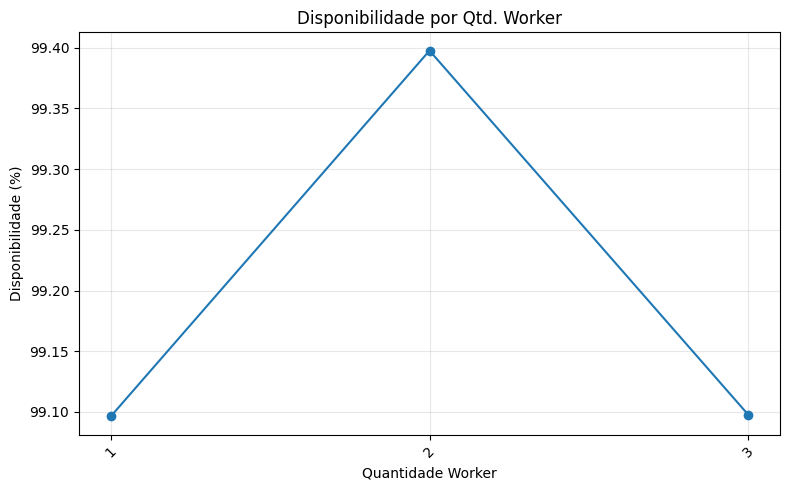

In [119]:
plt.figure(figsize=(8, 5))
plt.plot(df_resultados['Qtd. Worker'], df_resultados['Disponibilidade'], marker='o')
plt.xlabel('Quantidade Worker')
plt.ylabel('Disponibilidade (%)')
plt.title('Disponibilidade por Qtd. Worker')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
